<a href="https://colab.research.google.com/github/noviantisafitri/Machine-Learning-for-Beginners/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Novianti_Safitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/Machine-Learning-for-Beginners/refs/heads/main/Clustering.csv')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Jika 'length_binned' kolom kategorikal, kita encode kolom tersebut
label_encoder = LabelEncoder()
df['length_binned'] = label_encoder.fit_transform(df['length_binned'])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Pastikan 'Cluster' adalah label yang ingin diprediksi
y = df['Cluster']

# Bagi data menjadi data latih dan uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Standarisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Hanya data numerik yang akan distandarisasi
X_test = scaler.transform(X_test)

# Sekarang data siap untuk klasifikasi

Tahapan diatas adalah proses dalam melakukan persiapan data untuk klasifikasi dengan langkah-langkah berikut: pertama, kolom kategorikal length_binned dikonversi ke bentuk numerik menggunakan Label Encoding. Selanjutnya, data dipisahkan menjadi fitur (X) dan target (y), di mana kolom Cluster menjadi label yang akan diprediksi. Kemudian, data dibagi menjadi data latih (30%) dan data uji (70%) menggunakan train_test_split. Terakhir, fitur numerik distandarisasi menggunakan StandardScaler agar memiliki distribusi dengan rata-rata 0 dan varians 1, memastikan performa optimal pada model klasifikasi.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [75]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


Tahap ini menginisialisasi beberapa algoritma klasifikasi yang akan digunakan untuk membangun model. Model yang dipilih meliputi Logistic Regression dan K-Nearest Neighbors. Setiap model memiliki pendekatan yang berbeda dalam mengklasifikasikan data, sehingga nantinya dapat dibandingkan untuk menentukan performa terbaik berdasarkan metrik evaluasi.

In [76]:
# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi data uji
    accuracy = accuracy_score(y_test, y_pred)  # Hitung akurasi
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       520
           2       1.00      1.00      1.00       287
           3       0.99      1.00      0.99       294
           4       1.00      0.98      0.99       295

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396

K-Nearest Neighbors Accuracy: 0.99
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       520
           2       1.00      1.00      1.00       287
           3       0.99      1.00      0.99       294
           4       0.99      0.98      0.99       295

    accuracy                           0.99      1396
   macro avg       0.99      0.99      0.99      1396
weighted avg       0.99      0.99      0.99      1396



Model klasifikasi telah diuji menggunakan beberapa algoritma, dan hasil evaluasi menunjukkan akurasi yang sangat tinggi untuk semua model. **Logistic Regression** mencapai akurasi **100%**, dengan precision, recall, dan f1-score yang sempurna untuk setiap kelas, menunjukkan bahwa model ini mampu mengklasifikasikan data dengan sangat baik tanpa kesalahan.  

**K-Nearest Neighbors (KNN)** juga menunjukkan performa yang hampir sempurna dengan akurasi **99%**. Perbedaan kecil dalam recall dan f1-score di beberapa kelas menunjukkan sedikit kesalahan klasifikasi, tetapi secara keseluruhan, model tetap sangat baik dalam mengidentifikasi pola dalam data.  

Akurasi yang sangat tinggi ini bisa mengindikasikan bahwa model bekerja sangat baik atau ada kemungkinan overfitting, terutama jika data pelatihan dan pengujian memiliki pola yang sangat mirip.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [77]:
# Evaluasi setiap model
for name, model in models.items():
    print(f"\nEvaluasi Model: {name}")

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cetak hasil evaluasi
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")


Evaluasi Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Evaluasi Model: K-Nearest Neighbors
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


Evaluasi model menunjukkan bahwa **Logistic Regression** memiliki performa sempurna dengan **akurasi, precision, recall, dan F1-score sebesar 100%**, menandakan model ini mampu mengklasifikasikan data tanpa kesalahan.  

**K-Nearest Neighbors (KNN)** juga menunjukkan hasil yang sangat tinggi dengan **akurasi 99%**, serta precision, recall, dan F1-score yang hampir sempurna. Perbedaan kecil dibanding Logistic Regression menunjukkan bahwa KNN masih memiliki sedikit kesalahan dalam klasifikasi, tetapi tetap sangat andal.  

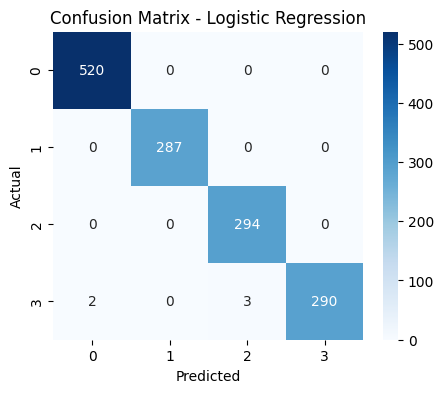

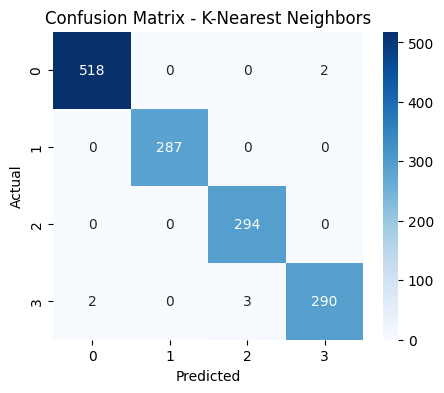

In [78]:
# Menampilkan confusion matrix untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

Confusion matrix menunjukkan bahwa **Logistic Regression** memiliki performa hampir sempurna, dengan hanya sedikit kesalahan pada **Cluster 4**, di mana **2 sampel salah diklasifikasikan sebagai Cluster 1 dan 3 sampel sebagai Cluster 3**.  

Sementara itu, **K-Nearest Neighbors (KNN)** juga memiliki hasil yang sangat baik, tetapi terdapat sedikit kesalahan pada **Cluster 1**, di mana **2 sampel salah diklasifikasikan sebagai Cluster 4**.  

Secara keseluruhan, kedua model memiliki kemampuan klasifikasi yang sangat tinggi, dengan hanya sedikit kesalahan pada beberapa kelas tertentu. Hal ini menunjukkan bahwa data memiliki pola yang jelas, dan model dapat membedakan setiap cluster dengan baik.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan evaluasi model klasifikasi yang telah dilakukan, berikut adalah analisis dari hasil yang diperoleh:  

- Dari confusion matrix, terlihat bahwa kesalahan klasifikasi terjadi terutama pada **Cluster 4**, di mana **beberapa sampel salah diklasifikasikan sebagai Cluster 1 atau Cluster 3**. Namun, jumlah kesalahan ini sangat kecil dan tidak signifikan dalam memengaruhi keseluruhan akurasi.  
- **Logistic Regression mencapai akurasi sempurna (100%)**, yang bisa menjadi indikasi overfitting, terutama jika model terlalu menyesuaikan dengan data latih dan tidak cukup generik untuk data baru. Namun, karena dataset ini tampaknya memiliki pola yang jelas, overfitting tidak terlalu menjadi masalah besar.  
- **KNN dengan akurasi 99%** menunjukkan bahwa model tetap kuat, tetapi mungkin lebih fleksibel dibandingkan Logistic Regression.  

#### **Rekomendasi Tindakan Lanjutan**  
- **Jika overfitting terjadi**, dapat dilakukan:
  - **Regularisasi pada Logistic Regression** untuk mengurangi kompleksitas model.
  - **Menguji dengan data baru atau unseen data** untuk memastikan generalisasi model tetap baik.  
- **Jika ingin meningkatkan performa lebih lanjut**, langkah-langkah berikut bisa dilakukan:
  - **Mencoba model lain**, seperti **Random Forest, Support Vector Machine (SVM), atau Gradient Boosting** untuk melihat apakah ada peningkatan performa.  
  - **Melakukan tuning hyperparameter pada KNN** dengan mencari jumlah tetangga (k) yang optimal menggunakan cross-validation.  
  - **Menambah data latih**, terutama jika jumlah data masih terbatas, untuk meningkatkan generalisasi model terhadap berbagai pola klasifikasi.  